In [2]:
import numpy as np
import matplotlib.pyplot as plt

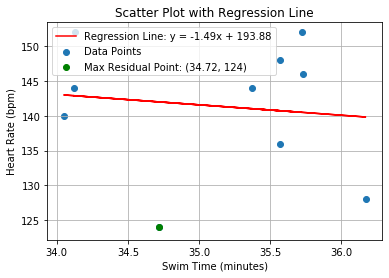

Slope (m): -1.49
Y-Intercept (b): 193.88
Max Residual Point : (34.72,124)


In [10]:
swim_time = [34.12, 35.72, 34.72, 34.05, 34.13, 35.73, 36.17, 35.57, 35.37, 35.57]
heart_rate = [144, 152, 124, 140, 152, 146, 128, 136, 144, 148]

# Visualize the data with a scatter plot
plt.scatter(swim_time, heart_rate, label='Data Points')
plt.xlabel('Swim Time (minutes)')
plt.ylabel('Heart Rate (bpm)')

# Linear regression
def least_squares_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(np.array(x) * np.array(y))
    x_squared_mean = np.mean(np.array(x) * np.array(x))

    m = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
    b = y_mean - m * x_mean

    return m, b

m, b = least_squares_regression(swim_time, heart_rate)

# Add the regression line to the plot
regression_line = [m * x + b for x in swim_time]
plt.plot(swim_time, regression_line, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')

# Calculate the residuals and find the point with the largest residual
residuals = [y - (m * x + b) for x, y in zip(swim_time, heart_rate)]
max_residual_index = np.argmax(np.abs(residuals))
max_residual_point = (swim_time[max_residual_index], heart_rate[max_residual_index])

plt.scatter(*max_residual_point, color='green', label=f'Max Residual Point: {max_residual_point}', zorder=5)

plt.legend()
plt.title('Scatter Plot with Regression Line')
plt.grid(True)
plt.show()

# Slope and y-intercept of the regression line
print(f'Slope (m): {m:.2f}')
print(f'Y-Intercept (b): {b:.2f}')
print(f'Max Residual Point : ({max_residual_point[0]},{max_residual_point[1]})')